# 0. 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 공통 모듈 임포트
import sklearn
import numpy as np
import pandas as pd

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


import sys
#os: Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게하는 모듈
import os
#tarfile: 여러 개의 파일을 tar 형식으로 합치거나 이를 해제할 때 사용하는 모듈
import tarfile
#urllib: URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import urllib.request

#1. 문제 정의 및 데이터 수집

In [3]:
# 데이터 불러오기 및 판다스 데이터프레임 객체에 담기: pd.read_csv()
train =  pd.read_csv('/content/drive/MyDrive/02_코랩/02_ai팩토리/공기압축기_이상_판단/train_data.csv')
test =  pd.read_csv('/content/drive/MyDrive/02_코랩/02_ai팩토리/공기압축기_이상_판단/test_data.csv')

#2. 점검 및 탐색

## 데이터 탐색

In [4]:
# 데이터 확인하기, 셀의 마지막줄에 객체 입력 시 확인 가능,
train

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0
...,...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,2416.0,66.84,3.34,7
2459,2.04,46.94,0.7,26.34,2155.0,63.94,3.20,7
2460,1.19,35.74,0.7,15.39,1259.0,53.99,2.70,7
2461,1.21,36.00,0.7,15.64,1280.0,54.22,2.71,7


In [5]:
test

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0
...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7
7385,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7
7386,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7
7387,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   out_pressure   2463 non-null   float64
 3   motor_current  2463 non-null   float64
 4   motor_rpm      2463 non-null   float64
 5   motor_temp     2463 non-null   float64
 6   motor_vibe     2463 non-null   float64
 7   type           2463 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 154.1 KB


In [7]:
#결측치 개수 확인: isnull(),sum()
train.isnull().sum()

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

In [8]:
# 데이터의 통계 자료 확인하기: describe()
train.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386,2.230113
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000


In [9]:
# groupby + 다른 집계 함수 설명.
train.groupby('type').mean()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
type,,,,,,,
0,2.288264,50.286481,0.7,29.612616,2422.831019,66.920417,3.345926
1,1.378672,47.503767,0.7,20.296125,2346.306233,64.243388,3.901572
2,0.647158,46.121393,0.7,10.354044,2329.617486,62.884481,2.594590
3,4.270588,51.005588,0.7,49.470588,2440.359477,68.115033,4.556144
4,2.186275,48.935556,0.7,28.291307,2314.728758,65.719248,3.286307
5,2.272129,50.068193,0.7,29.398795,2405.341365,66.725863,3.336586
6,2.222972,49.422932,0.7,28.768273,2353.755020,66.152892,3.307952
7,2.226559,49.470108,0.7,28.813925,2357.500000,66.194355,3.309946


In [10]:
# groupby + 다른 집계 함수 설명.
test.groupby('type').mean()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
type,,,,,,,
0,2.207276,49.741651,0.700000,29.111350,2368.987654,66.300054,3.340625
1,1.397615,47.948365,0.700000,20.630388,2395.774164,64.619702,3.131364
2,0.656202,46.548588,0.700000,10.552423,2365.934426,63.333944,2.613379
3,4.130131,50.093617,0.700000,48.016340,2363.023965,67.368965,4.540153
4,2.250806,49.855120,0.698715,29.153301,2385.258170,66.502800,3.325501
5,2.216252,49.513307,0.700000,28.869880,2357.748327,66.197336,3.318220
6,2.221954,50.082383,0.700000,29.429264,2392.676037,66.585569,3.358969
7,2.219857,49.411254,0.700000,28.758459,2352.222222,66.135950,3.308566


In [11]:
# EDA 관련 라이브러리 => pandas_profiling

## 시각화

In [49]:
#전처리
# 설비 번호 [0, 4, 5, 6, 7]: 30HP(마력)
# 설비 번호 1: 20HP
# 설비 번호 2: 10HP
# 설비 번호 3: 50HP
title_mapping = {0: 30, 4:30, 5:30, 6:30, 7:30, 1:20, 2:10, 3:50}
train3 = train.drop('out_pressure', axis = 1)
test3 = test.drop('out_pressure', axis = 1)
train3['hp'] = train3['type'].map(title_mapping)
test3['hp'] = test3['type'].map(title_mapping)

array([[<Axes: title={'center': 'air_inflow'}>,
        <Axes: title={'center': 'air_end_temp'}>,
        <Axes: title={'center': 'motor_current'}>],
       [<Axes: title={'center': 'motor_rpm'}>,
        <Axes: title={'center': 'motor_temp'}>,
        <Axes: title={'center': 'motor_vibe'}>],
       [<Axes: title={'center': 'type'}>, <Axes: title={'center': 'hp'}>,
        <Axes: >]], dtype=object)

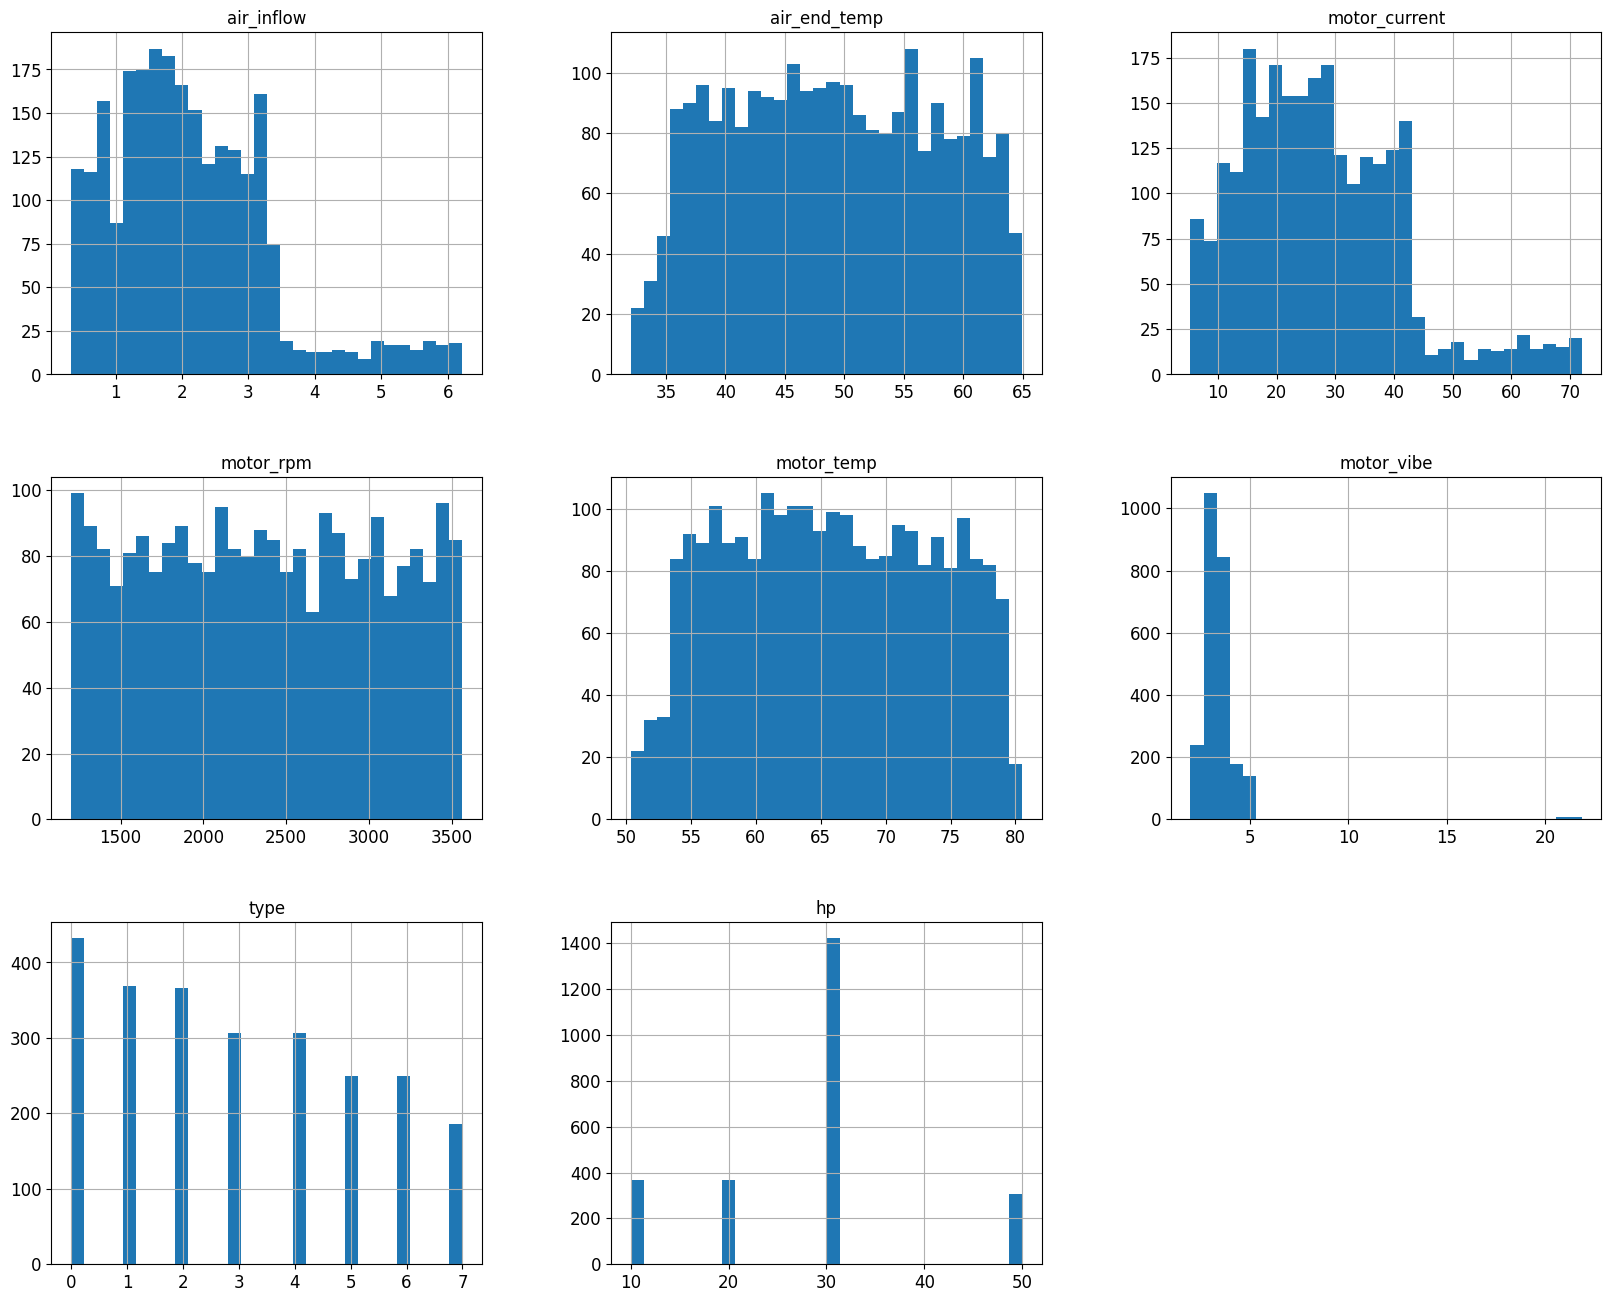

In [37]:
train3.hist(bins=30, figsize=(20,16))

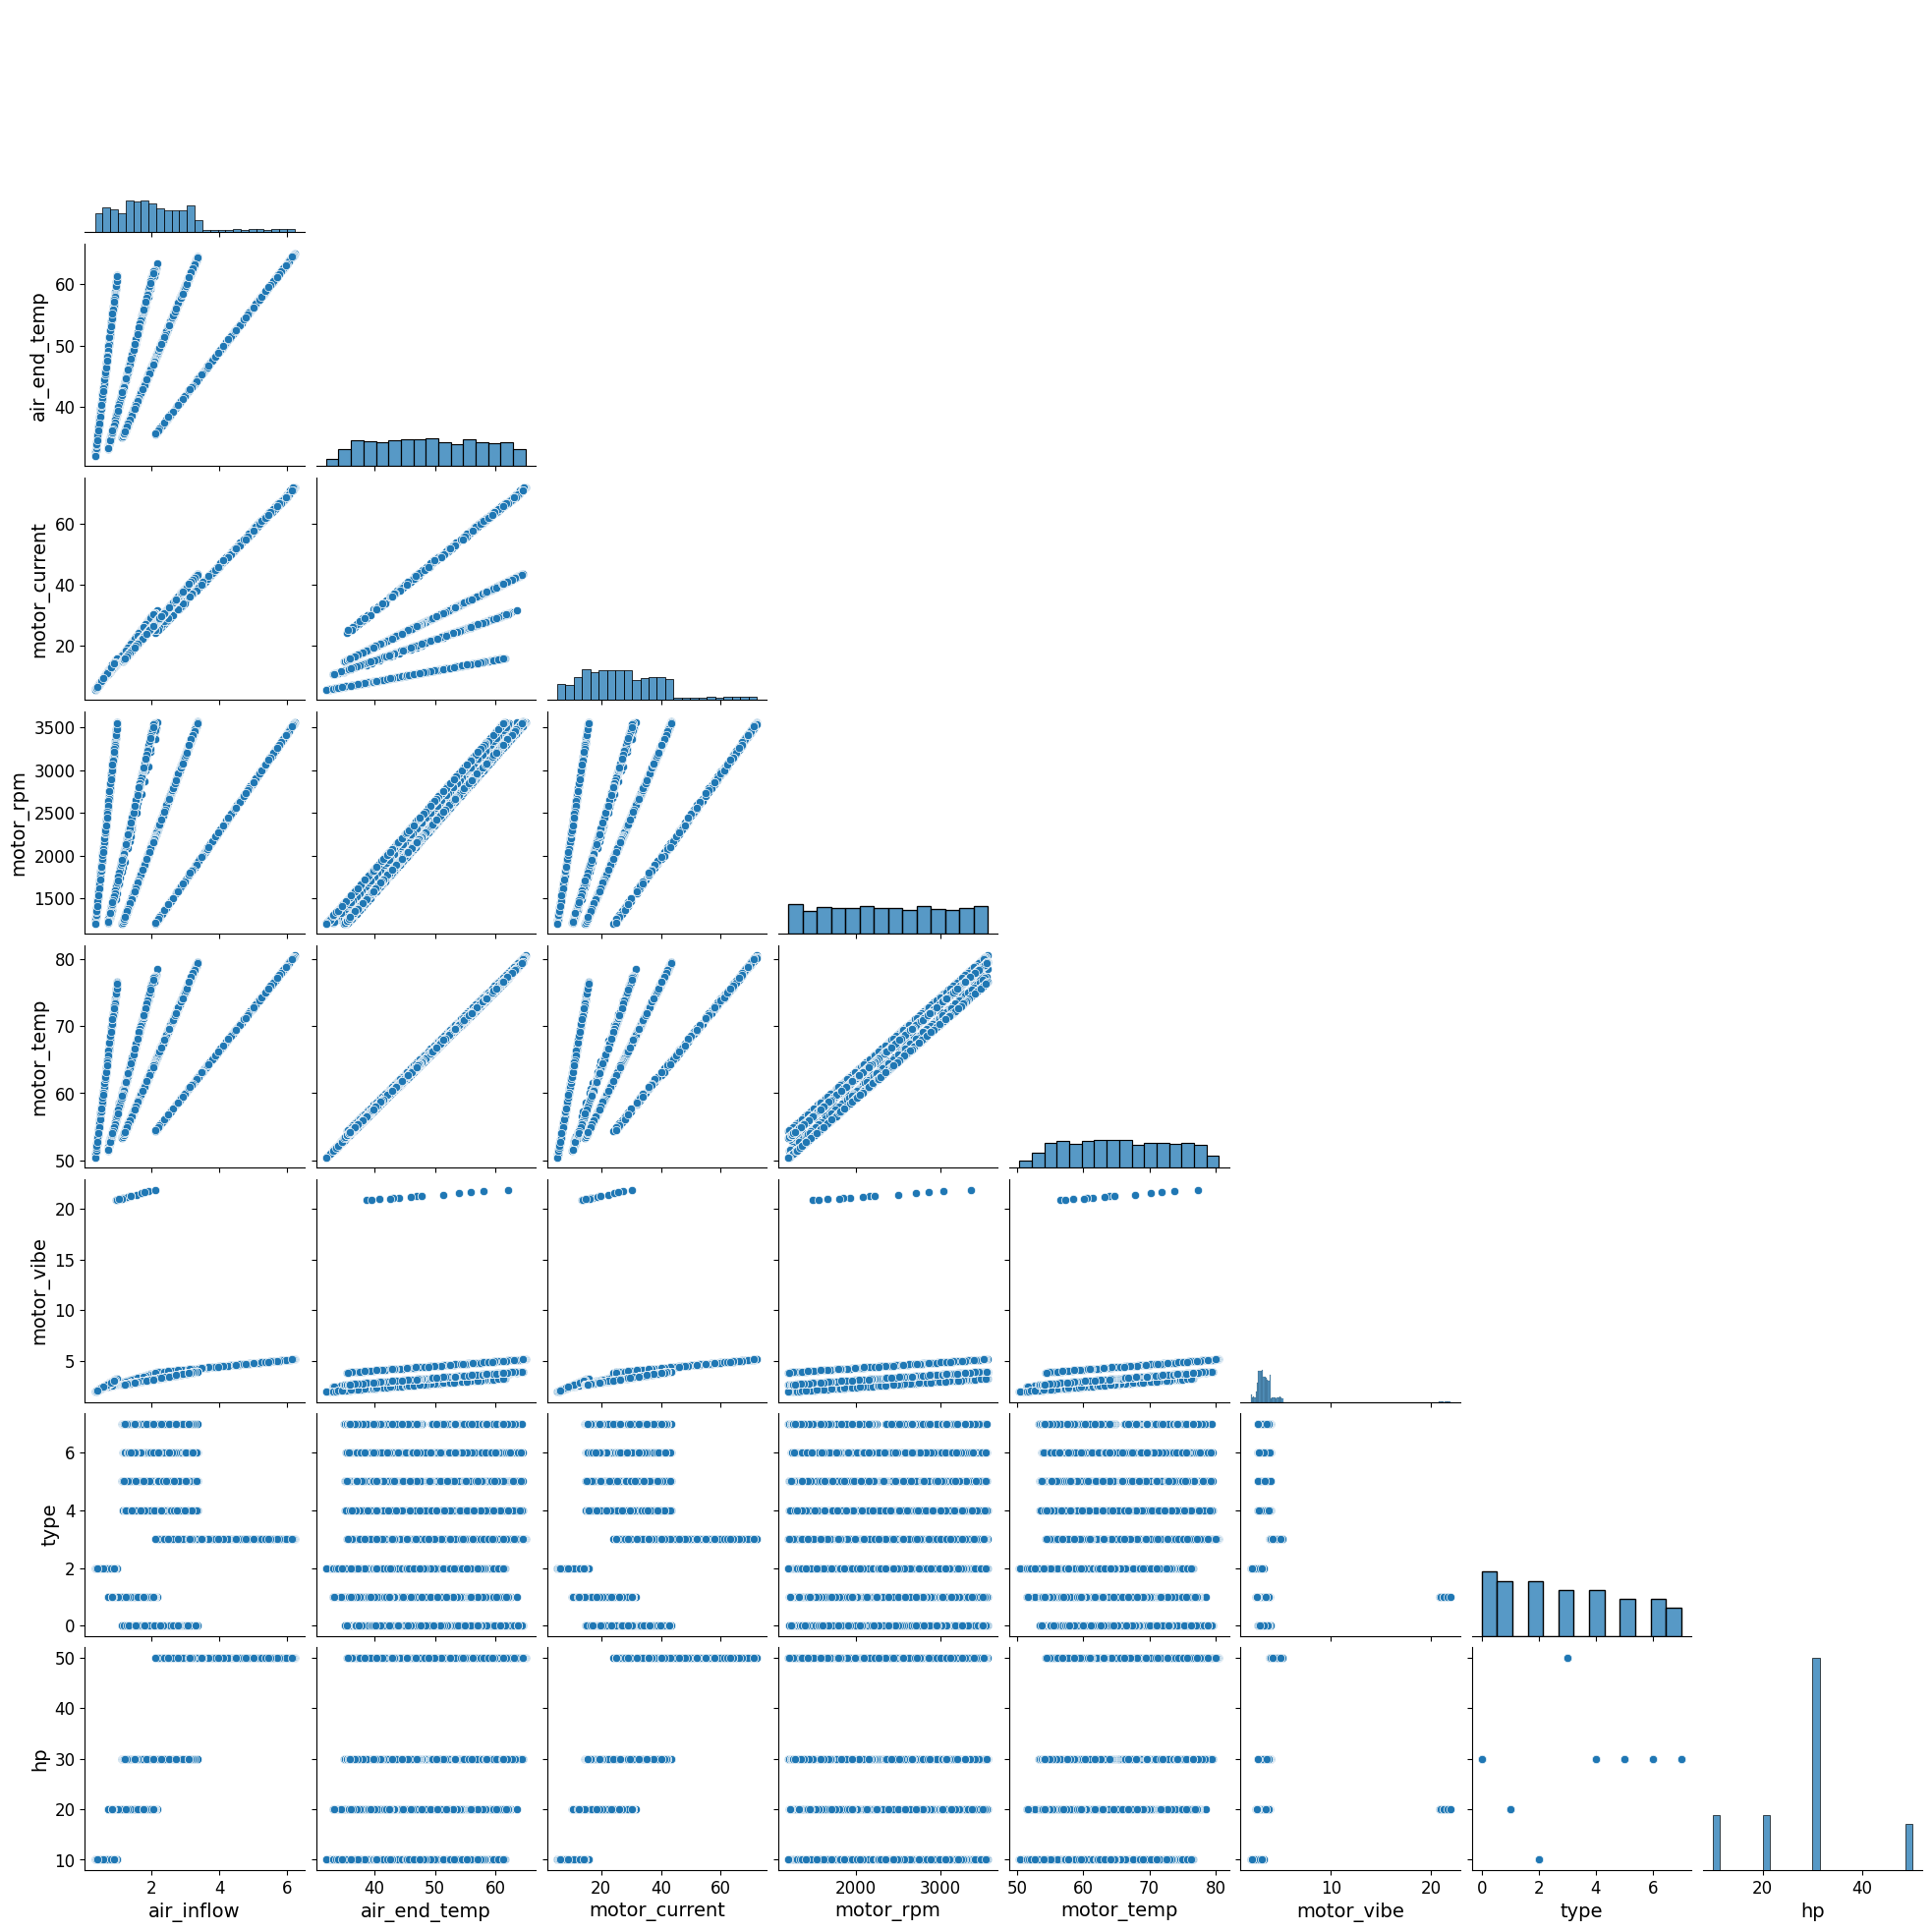

In [38]:
sns.pairplot(train3, corner = True)

<Axes: xlabel='air_inflow', ylabel='count'>

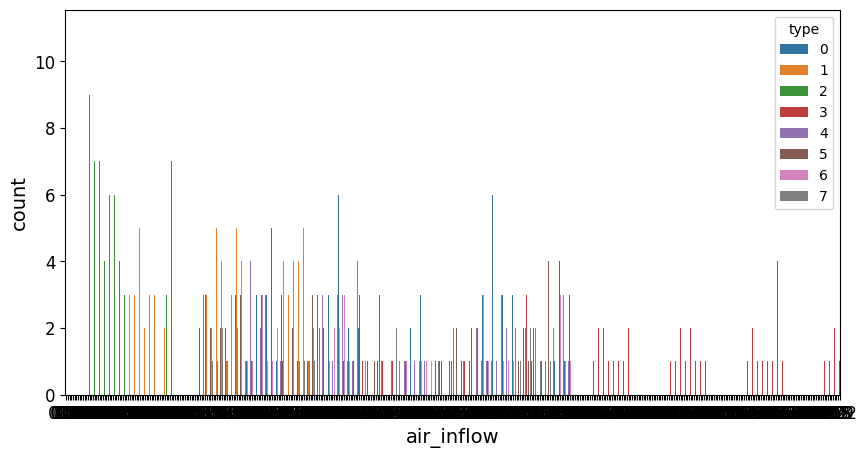

In [39]:
plt.figure(figsize = (10,5))
sns.countplot(x="air_inflow", data=train3, hue='type')

<Axes: >

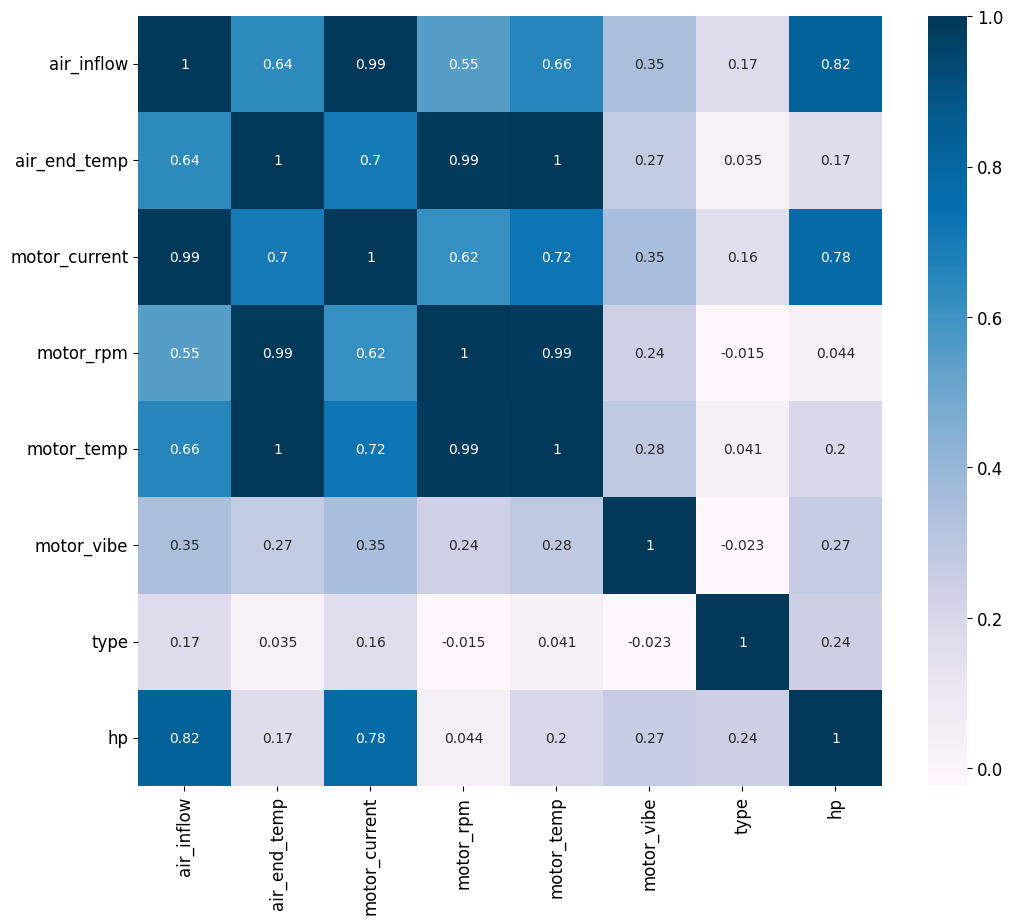

In [40]:
corr_matrix = train3.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, annot = True, cmap='PuBu')

<ipython-input-41-9a001a16e186>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="motor_vibe", data=train3, hue='hp', shade=True)
<ipython-input-41-9a001a16e186>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="motor_vibe", data=train3, hue='type', shade=True)


<Axes: xlabel='motor_vibe', ylabel='Density'>

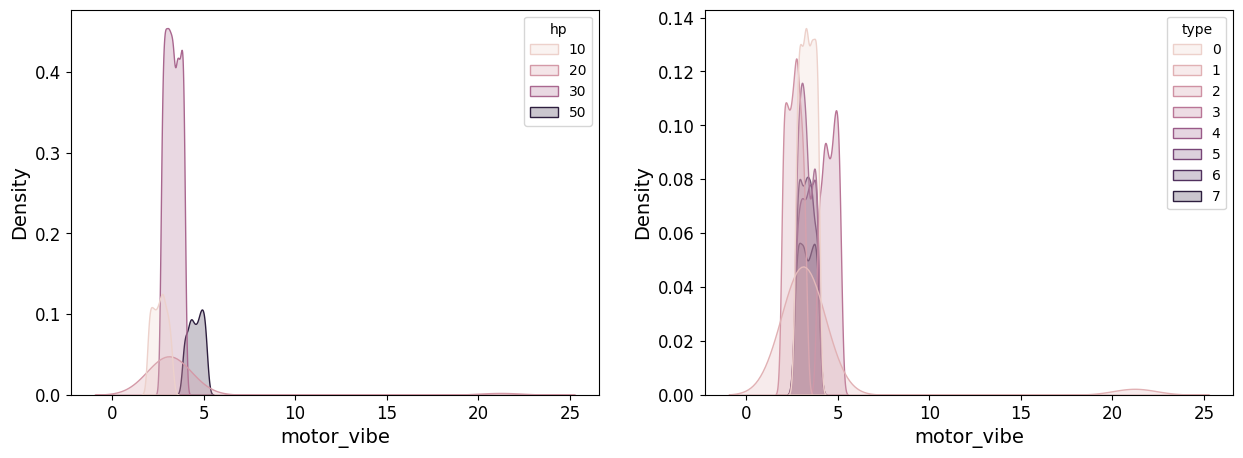

In [41]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)   
sns.kdeplot(x="motor_vibe", data=train3, hue='hp', shade=True)


plt.subplot(1, 2, 2)   
sns.kdeplot(x="motor_vibe", data=train3, hue='type', shade=True)

In [42]:
train3.columns

Index(['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm',
       'motor_temp', 'motor_vibe', 'type', 'hp'],
      dtype='object')

<ipython-input-43-6fb00410282c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="air_end_temp", data=train3, hue='hp', shade=True)
<ipython-input-43-6fb00410282c>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="air_end_temp", data=train3, hue='type', shade=True)
<ipython-input-43-6fb00410282c>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="motor_temp", data=train3, hue='hp', shade=True)
<ipython-input-43-6fb00410282c>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="motor_temp", dat

<Axes: xlabel='motor_rpm', ylabel='Density'>

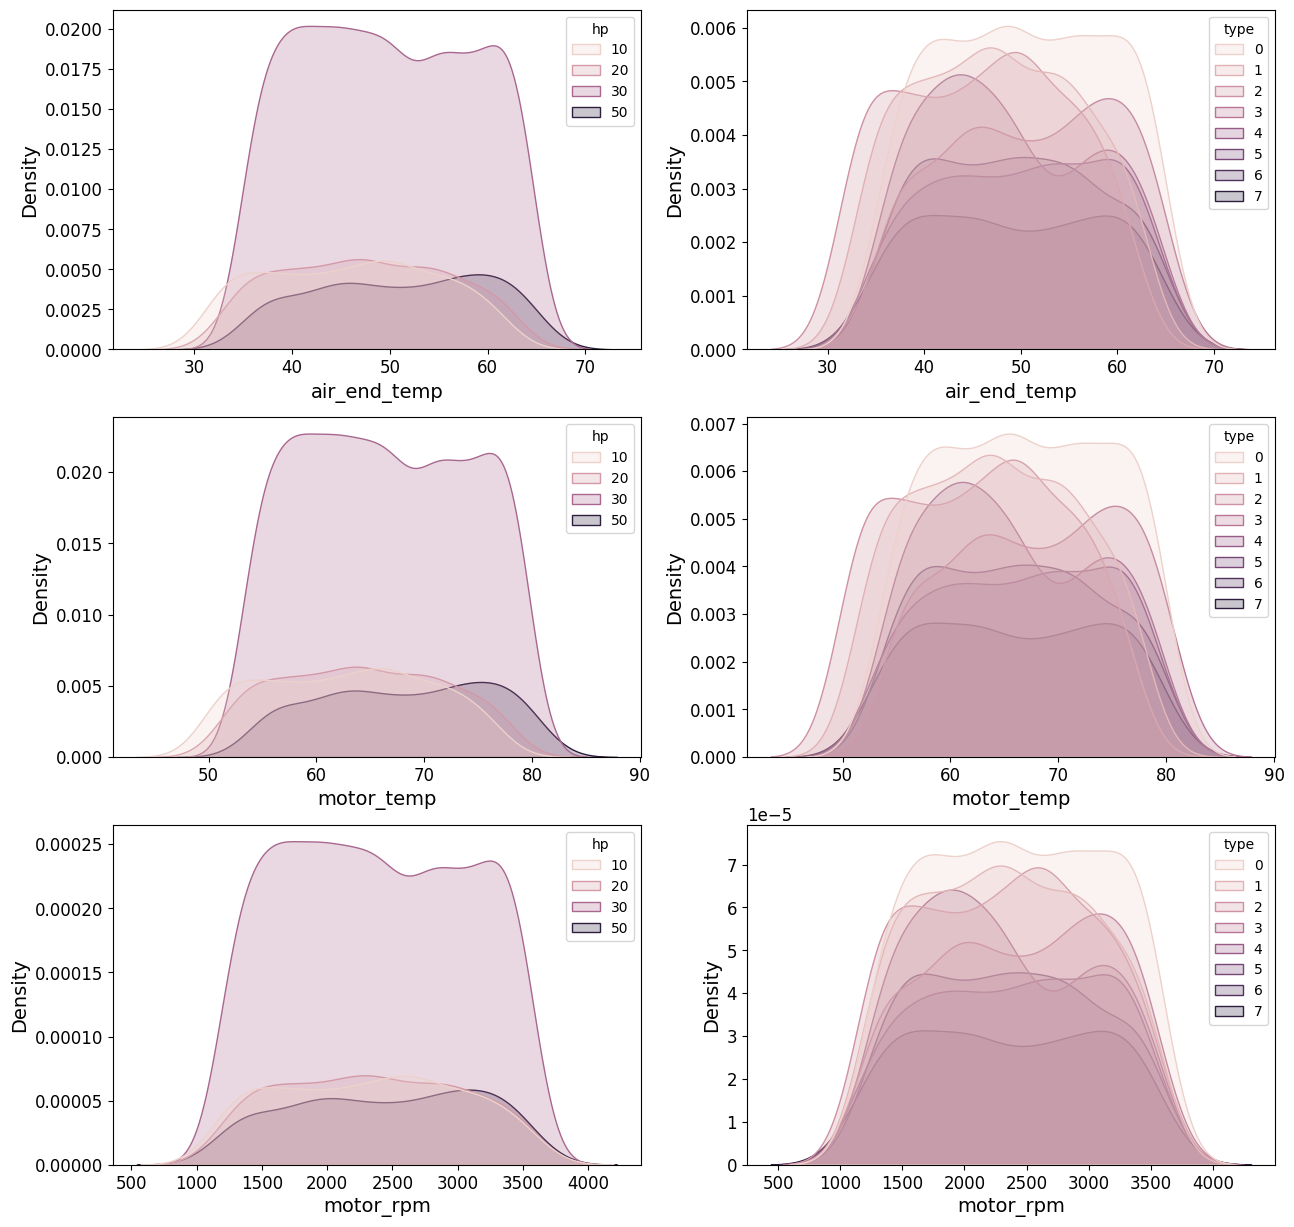

In [43]:
plt.figure(figsize = (15,15))

plt.subplot(3, 2, 1)   
sns.kdeplot(x="air_end_temp", data=train3, hue='hp', shade=True)
plt.subplot(3, 2, 2)   
sns.kdeplot(x="air_end_temp", data=train3, hue='type', shade=True)


plt.subplot(3, 2, 3)   
sns.kdeplot(x="motor_temp", data=train3, hue='hp', shade=True)
plt.subplot(3, 2, 4)   
sns.kdeplot(x="motor_temp", data=train3, hue='type', shade=True)

plt.subplot(3, 2, 5)   
sns.kdeplot(x="motor_rpm", data=train3, hue='hp', shade=True)
plt.subplot(3, 2, 6)   
sns.kdeplot(x="motor_rpm", data=train3, hue='type', shade=True)

#3. 전처리 및 정제

In [50]:
train4 = train3.drop(["motor_temp", "type"], axis = 1)
test4 = test3.drop(["motor_temp", "type"], axis = 1)

In [45]:
#OrdinalEncoder vs OnehotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
#data_cat_encoded = ordinal_encoder.fit_transform(data)
#data_cat_encoded

In [ ]:
# OnehotEncoder, 결과값이 희소행렬로 반환되기에 데이터를 확인하고 싶다면 .toarray()를 사용하여 배열로 변환해야함.처음부터 배열로 반환하려면 sparse = False 부여
#data.toarray()
#cat_encoder = OneHotEncoder(sparse = False)
#data_cat_1hot = cat_encoder.fit_transform(data)
#data_cat_1hot 

In [ ]:
# 인코딩된 카테고리의 원본 데이터 확인: categories_

In [ ]:
# 특징 공학: 데이터 확인 후 칼럼 추가.

In [ ]:
# 데이터 변환 => 정규화, 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
#scaler.fit(data)
#data_scaled = scaler.transform(data) 

#scaler = MinMaxScaler()
#scaler.fit(data)
#data_scaled = scaler.transform(data)

#data = pd.DataFrame(data_scaled, columns=data.feature_names) 

#4. 모델링 및 훈련

In [46]:
train4.isnull().sum()

air_inflow       0
air_end_temp     0
motor_current    0
motor_rpm        0
motor_vibe       0
hp               0
dtype: int64

In [93]:
from sklearn.covariance import EllipticEnvelope

# GMM 기반 이상탐지 모델 학습
clf = EllipticEnvelope(contamination=0.01)
clf.fit(train4)

# 이상치 탐지 결과 출력
y_pred_train = clf.predict(train4)
y_pred_test = clf.predict(test4.drop('output', axis=1))

print("Train Anomaly Score:", clf.score_samples(train4))
print("Test Anomaly Score:", clf.score_samples(test4.drop('output', axis=1)))
print("Train Anomaly Count:", np.sum(y_pred_train == -1))
print("Test Anomaly Count:", np.sum(y_pred_test == -1))

Train Anomaly Score: [-6.74038816 -6.35383522 -3.9349197  ... -3.59481485 -6.1104603
 -1.37431074]
Test Anomaly Score: [-7.10907104 -5.1933858  -2.17899096 ... -6.98570224 -5.04778206
 -3.53915393]
Train Anomaly Count: 25
Test Anomaly Count: 78


In [97]:
submission = pd.read_csv('/content/drive/MyDrive/02_코랩/02_ai팩토리/공기압축기_이상_판단/answer_sample.csv')

y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

submission['label'] = y_pred_test

In [99]:
submission[submission['label'] == 1]

,type,label
2502,2,1
2650,2,1
2653,2,1
2658,2,1
2746,2,1
...,...,...
4286,3,1
4341,3,1
4367,3,1
4377,3,1


In [101]:
submission.to_csv('/content/drive/MyDrive/02_코랩/02_ai팩토리/공기압축기_이상_판단/submission.csv', index=False)

#5. 평가

In [ ]:
 # confusion matrix

##결과 시각화

In [ ]:
# 이산형 데이터의 경우 히스토그램으로 표현

#6. 배포

In [ ]:
#my_model = model or piplineModel